In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import scipy.signal as signal

In [2]:
# This the max number of samples that can be stored in the RF Core RAM
AOA_RES_MAX_SIZE = 511
# Note this is a direct port of AOA.c::AOA_calcNumOfCteSamples
# this class makes all the samples the same size of 511!
def num_iqsamples_per_evt(cte_scan_ovs, cte_offset, cte_time):
    samp_per_evt = (((cte_time * 8) - cte_offset) * cte_scan_ovs)

    if samp_per_evt > AOA_RES_MAX_SIZE:
        samp_per_evt = AOA_RES_MAX_SIZE

    return samp_per_evt
# calculate the phase and the magnetude of the signal (sqrt(I^2 + Q^2)) and arct(Q/I)
def cal_magnitude(q_value,i_value):

    return math.sqrt(math.pow(q_value,2)+math.pow(i_value,2))

def cal_phase(q_value,i_value):

    return math.degrees(math.atan2(q_value,i_value))

C:\Users\pooneh\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\pooneh\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\pooneh\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:338: RuntimeWarning: More than 20 figures have b

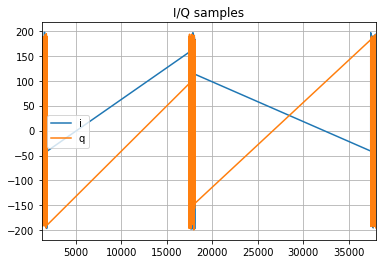

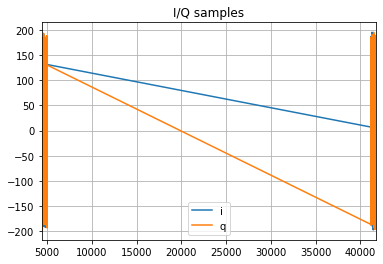

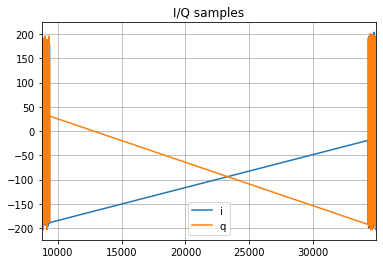

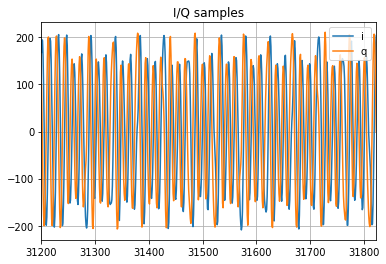

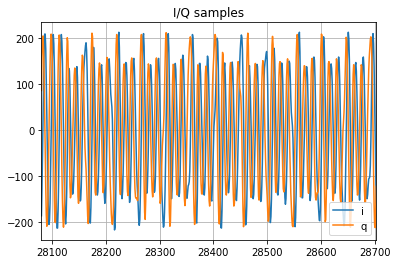

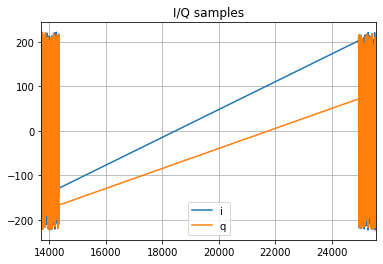

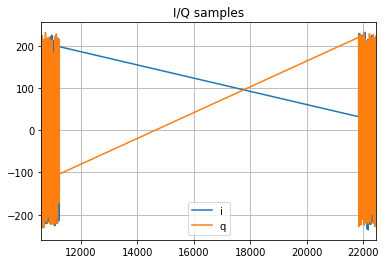

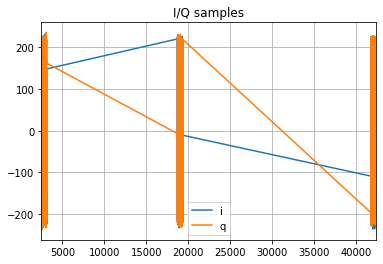

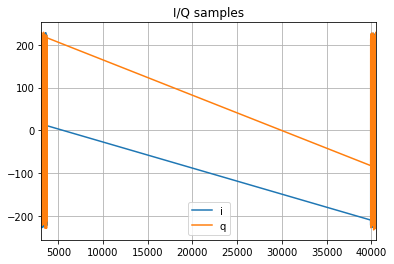

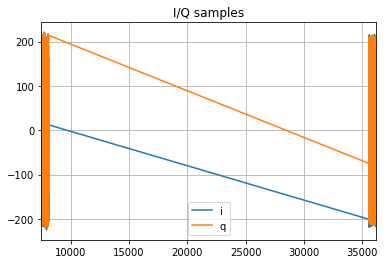

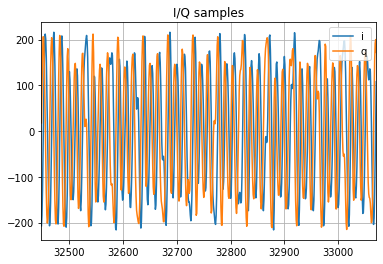

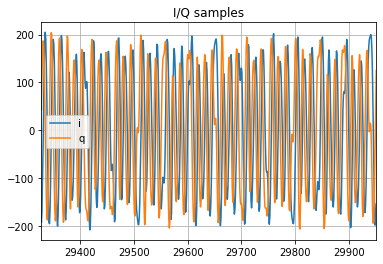

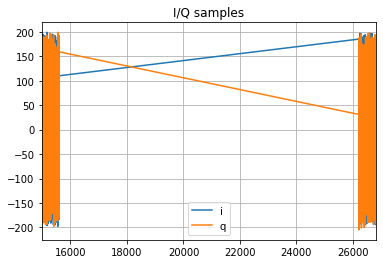

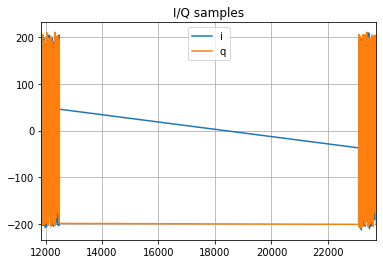

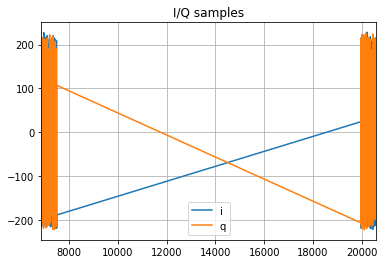

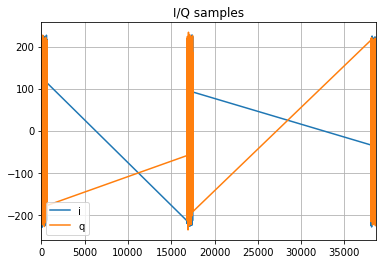

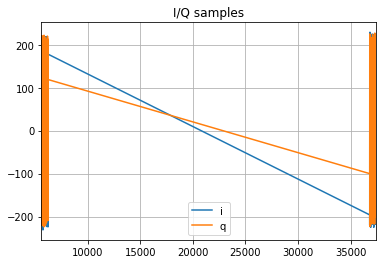

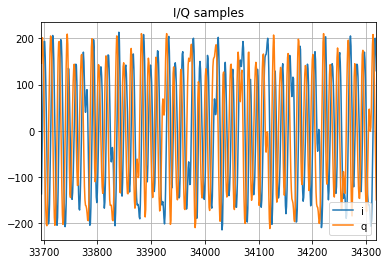

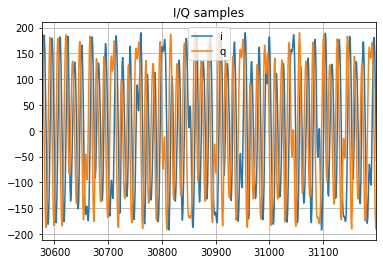

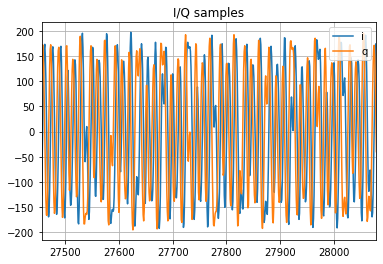

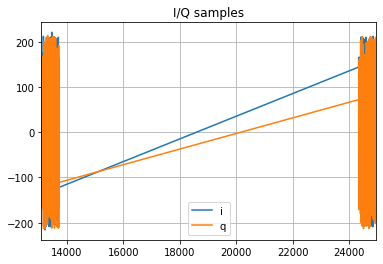

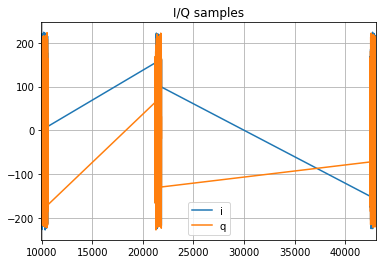

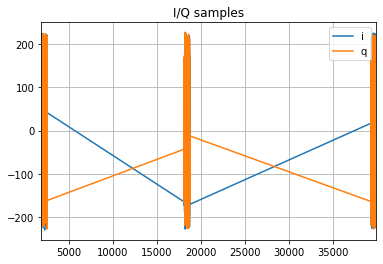

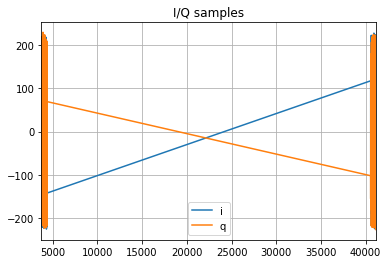

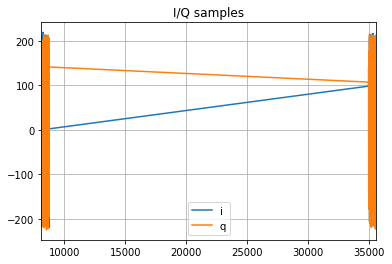

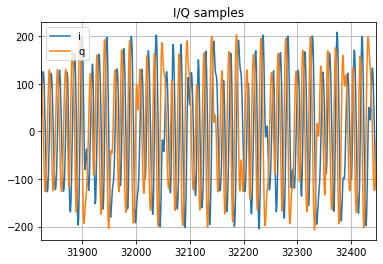

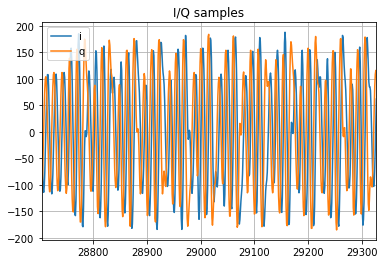

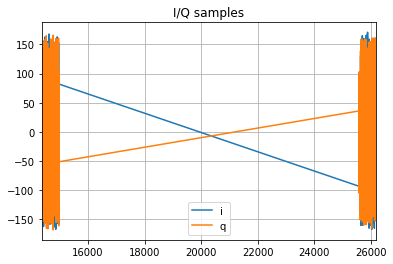

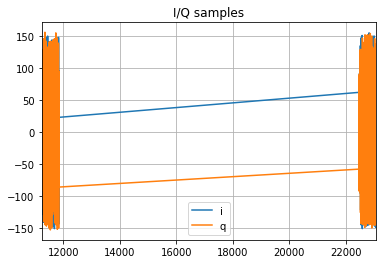

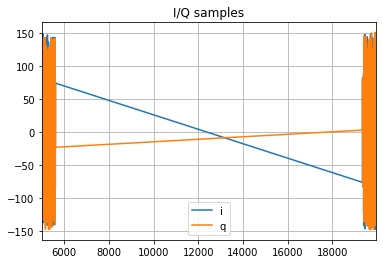

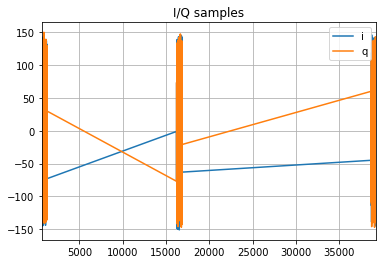

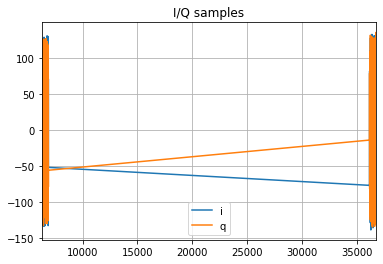

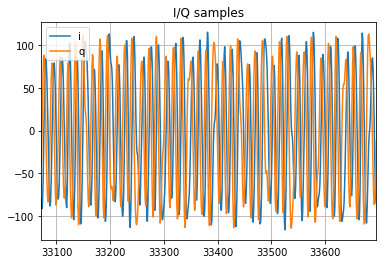

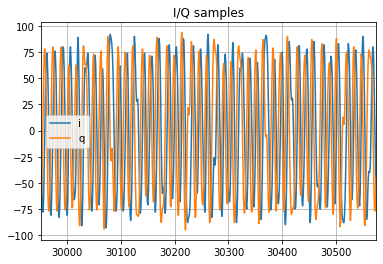

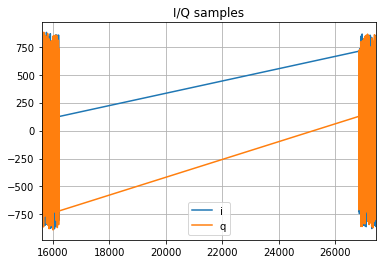

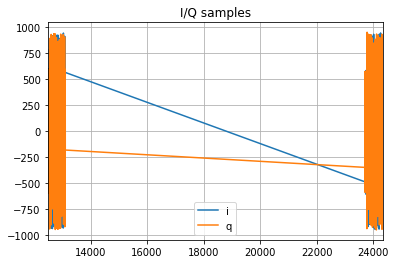

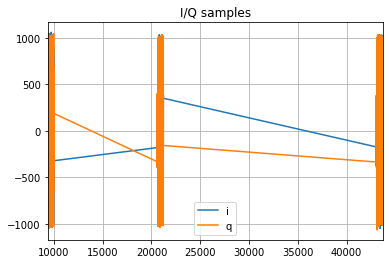

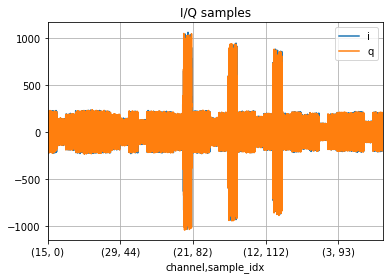

In [3]:
if __name__ == "__main__":
    
    path = 'C:/ti/simplelink_cc13x2_26x2_sdk_4_40_04_04/tools/ble5stack/rtls_agent/examples/3ANT/rtls_aoa_iq_with_rtls_util_export_into_csv_3ant_AoA_log/04_09_2021_17_31_26_rtls_raw_iq_samples_f88a5e2d7808_0.csv'
    df = pd.read_csv(path)
    aoa_cte_scan_ovs = 4
    aoa_cte_offset = 4
    aoa_cte_time = 20
    aoa_iq_samples_per_ce = num_iqsamples_per_evt(aoa_cte_scan_ovs, aoa_cte_offset, aoa_cte_time)
    
    #remove dublicates
    df = df.drop_duplicates()

    df['phase'] = df.apply(lambda row: cal_phase(row['q'], row['i']), axis=1)
    df['magnitude'] = df.apply(lambda row: cal_magnitude(row['q'], row['i']), axis=1)

    # Plot all the I/Q collected. Each channel will have a plot which contains I/Q samples.
    # If you have collected I/Q data on 37 data channels, then there will be 37 windows popped up
    grouped = df.groupby('channel')
    axes = grouped[['i', 'q']].plot(title="I/Q samples", grid=True)

    # Create 4 plots and each plot has x number of subplots. x = number of channels
    indexed = df.set_index(['channel', 'sample_idx'])
    # drop the dublicates
    indexed_modified = indexed.drop_duplicates()
    indexed_modified = indexed_modified[~indexed_modified.index.duplicated(keep='first')]
    axes = indexed_modified[['i', 'q']].plot(title="I/Q samples", grid=True)

    plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1870FA808>,
      dtype=object)

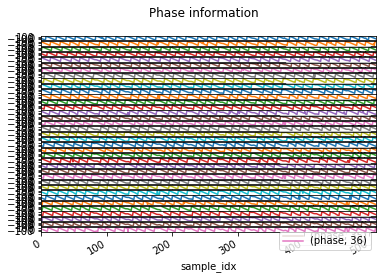

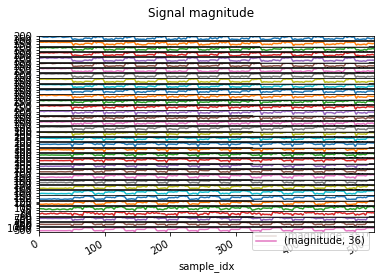

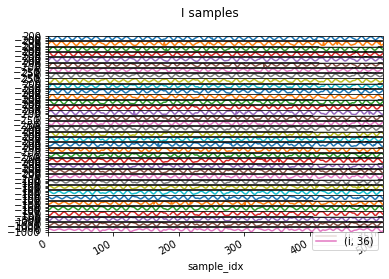

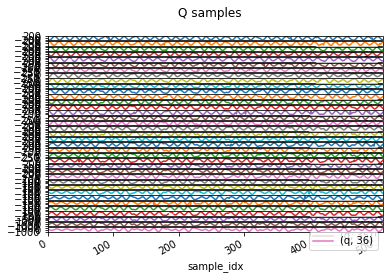

In [4]:
    indexed_modified.unstack(level=0)[['phase']].plot(subplots=True, title="Phase information", xlim=[0,aoa_iq_samples_per_ce], ylim=[-190,+190])
#     plt.savefig('Phase.png', dpi=300, bbox_inches='tight')
    indexed_modified.unstack(level=0)[['magnitude']].plot(subplots=True, title="Signal magnitude", xlim=[0,aoa_iq_samples_per_ce])
#     plt.savefig('Magnitude.png', dpi=300, bbox_inches='tight')
    indexed_modified.unstack(level=0)[['i']].plot(subplots=True, title="I samples", xlim=[0,aoa_iq_samples_per_ce])
#     plt.savefig('Isamples.png', dpi=300, bbox_inches='tight')
    indexed_modified.unstack(level=0)[['q']].plot(subplots=True, title="Q samples", xlim=[0,aoa_iq_samples_per_ce])
#     plt.savefig('Qsamples.png', dpi=300, bbox_inches='tight')

In [5]:
# teta = arcsin(landa*phase/2*&pi*d)
# where d is landa/2 teta is simply: arcsin(phase/pi)
indexed_modified['teta'] = np.degrees(np.arcsin(indexed_modified['phase']/180))

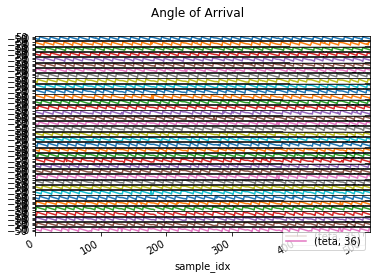

In [6]:
indexed_modified.unstack(level=0)[['teta']].plot(subplots=True, title="Angle of Arrival", xlim=[0,aoa_iq_samples_per_ce])
# plt.savefig('teta.png', dpi=300, bbox_inches='tight')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D187C51B88>,
      dtype=object)

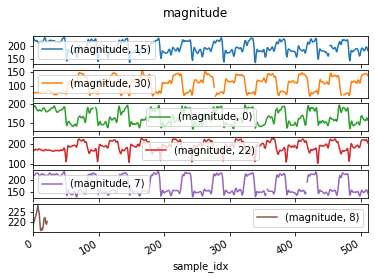

In [7]:
test = indexed_modified[0:624*5]
test.unstack(level=0)[['magnitude']].plot(subplots=True, title="magnitude", xlim=[0,aoa_iq_samples_per_ce])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1880E2AC8>,
      dtype=object)

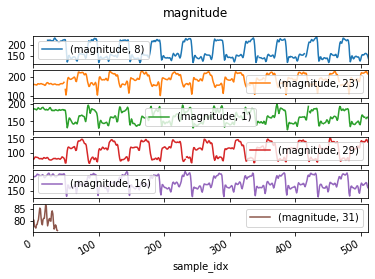

In [8]:
test = indexed_modified[624*5:624*10]
test.unstack(level=0)[['magnitude']].plot(subplots=True, title="magnitude", xlim=[0,aoa_iq_samples_per_ce])

In [9]:
indexed_modified.unstack(level=0)[['teta']]

teta                                                         \
channel            0          1          2          3          4          5    
sample_idx                                                                     
0           -8.270052  50.288196 -67.960266   9.840384  59.631571 -71.382230   
1          -16.833018  38.818369  68.876675   2.876492  45.704770  68.471602   
2          -24.462926  30.226694  53.859778  -5.069707  35.785377  51.566228   
3          -32.544197  22.481545  43.143394 -12.316191  26.401964  40.667200   
4          -42.356252  14.261122  33.019449 -19.864858  18.667503  30.301284   
...               ...        ...        ...        ...        ...        ...   
619         -3.263761  50.909842 -33.199813  31.535428 -15.976502 -11.476498   
620        -10.533297  39.425669 -42.630464  22.750183 -24.128252 -19.456312   
621        -19.004011  30.799703 -53.469670  15.268804 -31.691894 -26.944571   
622        -26.614209  22.990781 -69.059471   7.023989 -41.407838 -34.998742   
623        -34.610722  14.405356  71.486925  -0.089400 -52.224469 -45.182720   

                                                        ...             \
channel            6          7          8          9   ...         27   
sample_idx                                              ...              
0          -57.931494 -21.071450 -34.153235  70.564671  ...  39.304809   
1          -73.861111 -29.335400 -43.819182  54.855060  ...  28.953376   
2           67.375778 -38.358922 -56.888279  44.328660  ...  20.977432   
3           52.158362 -50.164439 -74.610600  34.311976  ...  13.157036   
4           41.839610 -63.390018  63.377312  25.885790  ...   5.465885   
...               ...        ...        ...        ...  ...        ...   
619         21.892136  55.198555  79.312979 -78.504134  ...  20.390771   
620         13.922544  43.876987  58.121339  63.212852  ...  13.373470   
621          6.717940  34.096157  47.087275  48.496360  ...   5.765866   
622         -0.678319  23.829889  37.981094  38.439237  ...  -1.653668   
623         -8.855845  15.329256  28.934128  28.827193  ... -10.201405   

                                                                              \
channel            28         29         30         31         32         33   
sample_idx                                                                     
0           19.399890   9.744391  -4.947625 -51.342007 -58.827785 -41.067141   
1           11.243366   3.240693 -12.555846 -65.176561 -81.693762 -52.044115   
2            4.372185  -3.991271 -19.494345  72.713871  60.056657 -69.713869   
3           -3.521582 -10.491092 -28.375411  56.325837  47.314833  68.700274   
4          -10.220439 -17.921632 -36.949184  43.496640  35.674706  52.817655   
...               ...        ...        ...        ...        ...        ...   
619          7.027765  25.761156 -21.114082 -13.615725 -25.968640 -17.266494   
620         -1.138457  17.372922 -48.100425 -20.195480 -36.304596 -24.962239   
621         -9.006570   9.481054 -60.097507 -27.896485 -45.996012 -33.865771   
622        -15.906505   2.656895  84.855023 -35.937427 -57.774307 -42.604920   
623        -24.633816  -5.504341  61.149923 -47.579678 -72.815275 -54.373650   

                                             
channel            34         35         36  
sample_idx                                   
0          -47.830352 -42.823188  16.869092  
1          -60.425914 -53.756502   8.334017  
2           81.857623 -70.286137   0.284204  
3           60.549247  67.992666  -6.742791  
4           47.621883  54.013863 -14.754665  
...               ...        ...        ...  
619          4.454043  25.798120 -38.252386  
620         -2.446433  17.508933 -48.800492  
621        -10.318121   9.430793 -61.684542  
622        -18.657365   2.245708  76.393680  
623        -26.409202  -5.692782  56.238115  

[624 rows x 37 columns]

In [10]:
indexed_modified['phase']
grouped_indexed_modified = indexed_modified.groupby('channel')
print('The Max phase in each channel is', grouped_indexed_modified[['phase']].max() 
       , '\n and The Max teta in each channel is' , grouped_indexed_modified[['teta']].max())

The Max phase in each channel is               phase
channel            
0        180.000000
1        179.685191
2        180.000000
3        180.000000
4        180.000000
5        180.000000
6        178.883990
7        180.000000
8        179.602119
9        179.632724
10       179.670718
11       180.000000
12       179.710630
13       180.000000
14       179.728458
15       179.363406
16       179.232692
17       180.000000
18       180.000000
19       179.703133
20       179.309723
21       178.122123
22       180.000000
23       180.000000
24       180.000000
25       180.000000
26       180.000000
27       175.667686
28       180.000000
29       178.375024
30       180.000000
31       179.309723
32       180.000000
33       178.636072
34       178.363423
35       178.379442
36       180.000000 
 and The Max teta in each channel is               teta
channel           
0        90.000000
1        86.610871
2        90.000000
3        90.000000
4        90.000000
5        90.0000

C:\Users\pooneh\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\pooneh\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\pooneh\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:338: RuntimeWarning: More than 20 figures have b

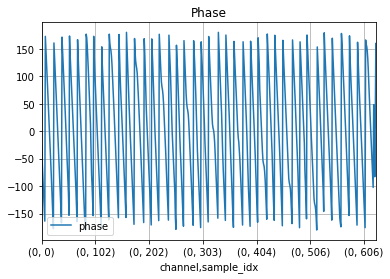

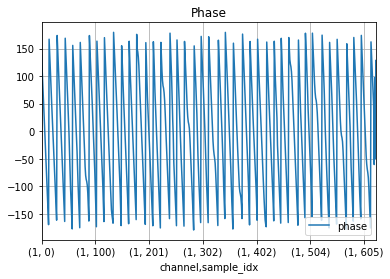

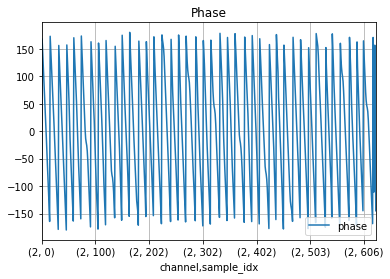

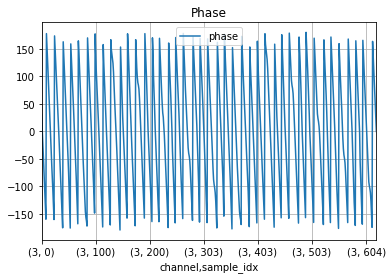

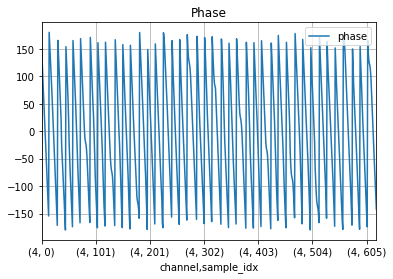

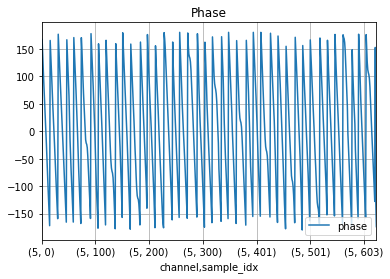

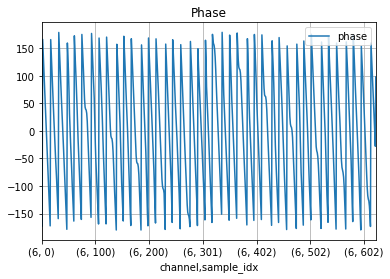

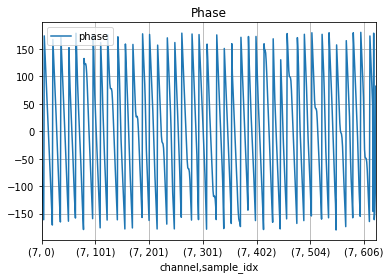

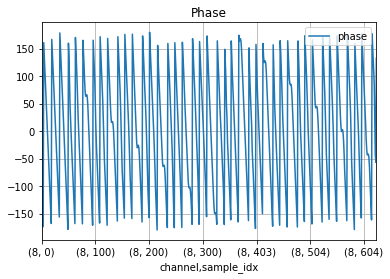

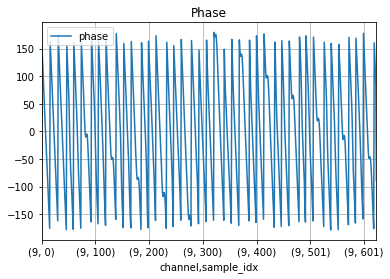

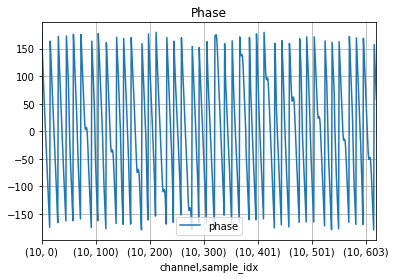

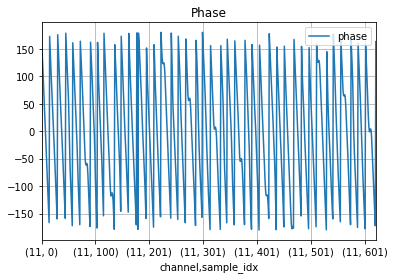

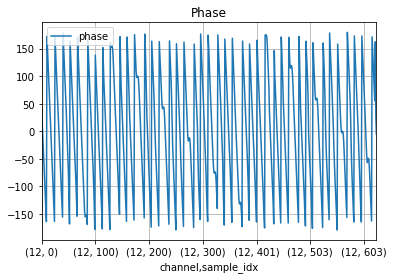

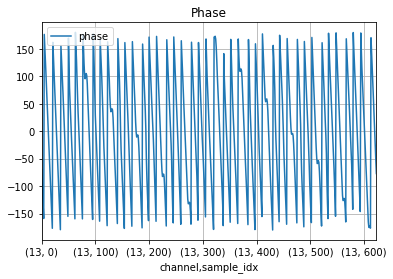

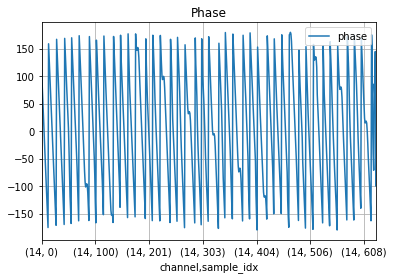

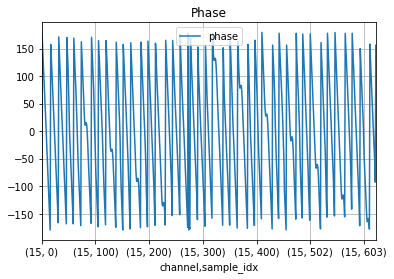

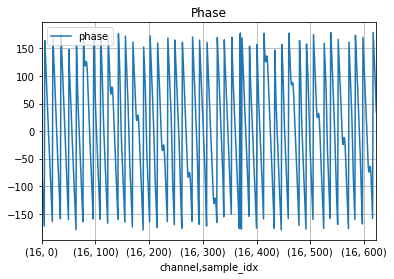

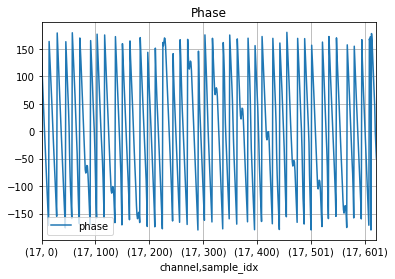

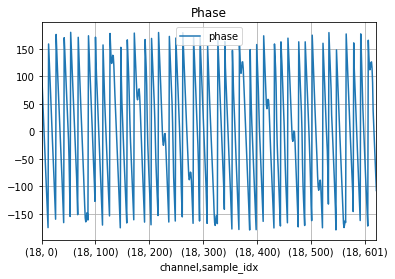

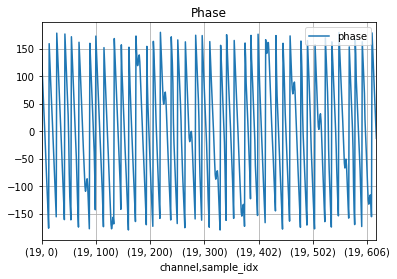

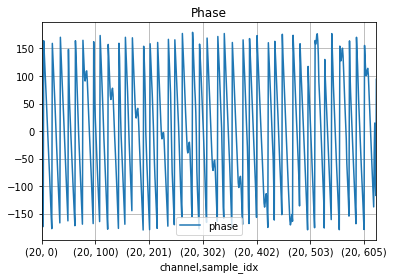

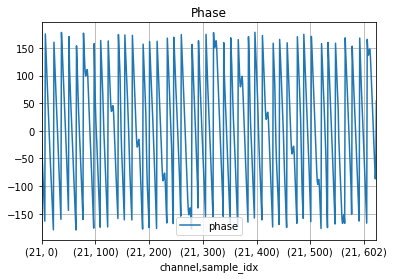

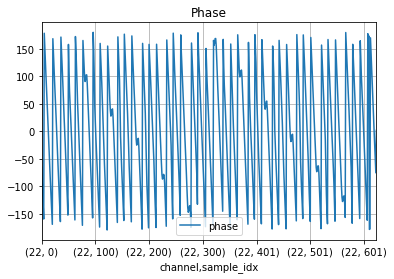

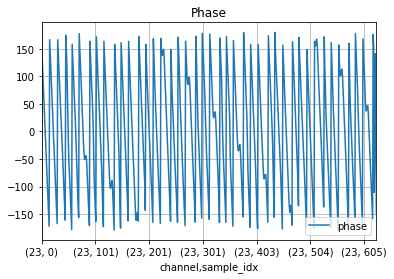

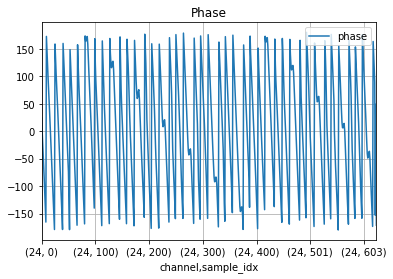

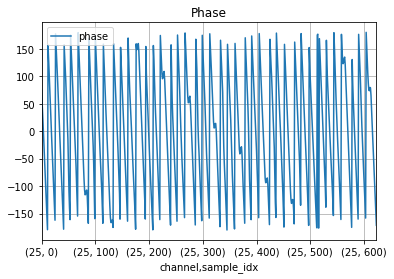

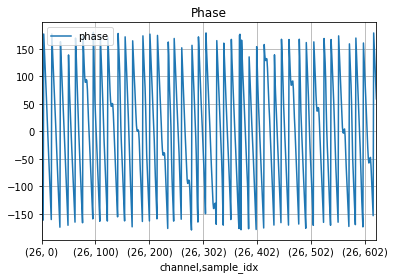

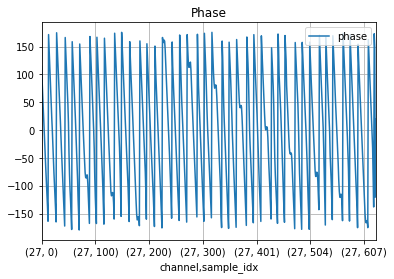

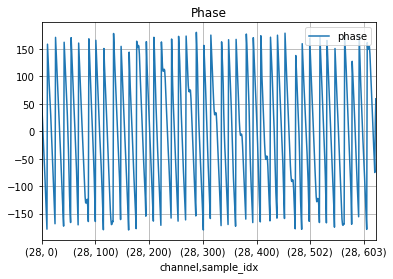

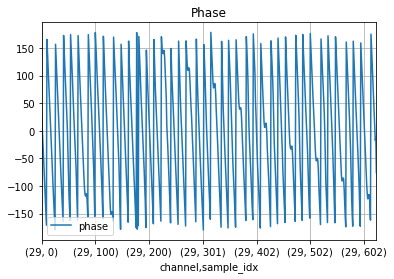

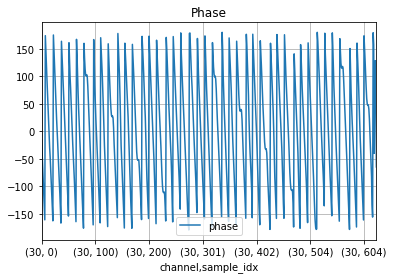

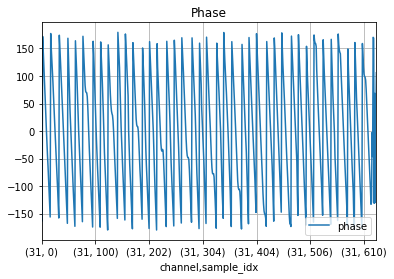

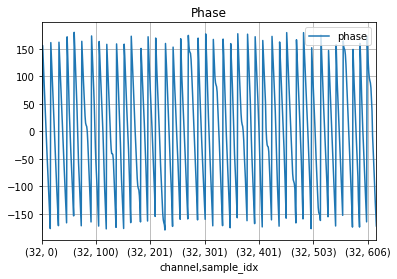

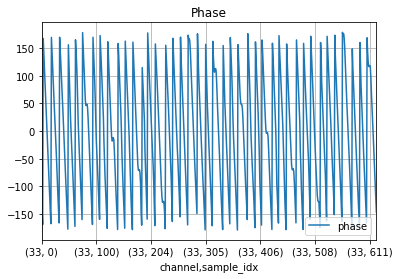

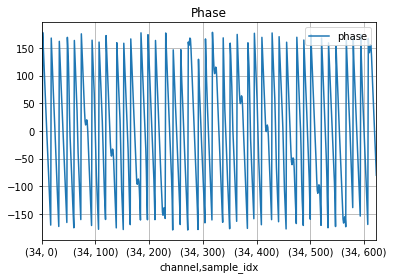

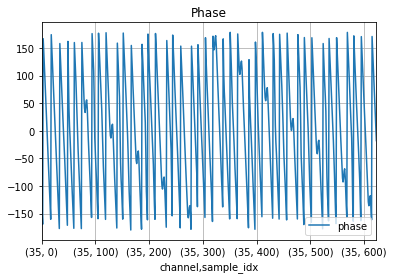

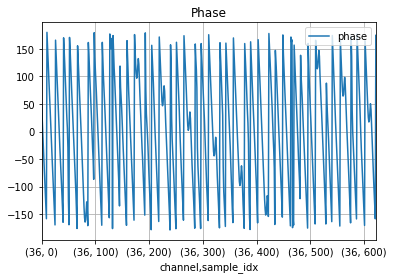

In [11]:
axes = grouped_indexed_modified[['phase']].plot(title="Phase", grid=True)

C:\Users\pooneh\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\pooneh\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\pooneh\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:338: RuntimeWarning: More than 20 figures have b

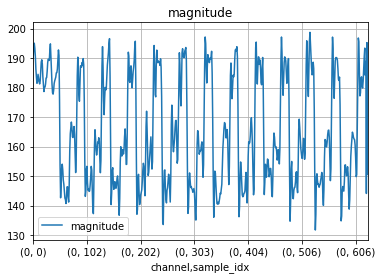

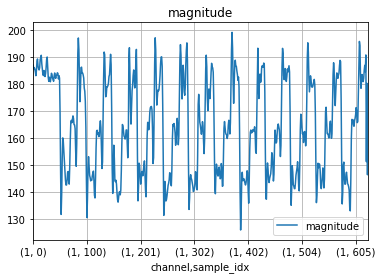

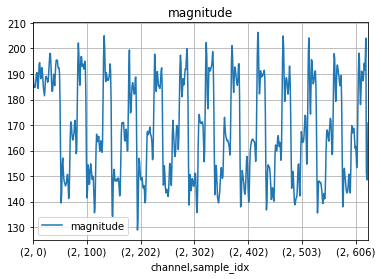

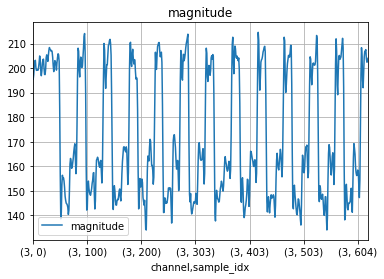

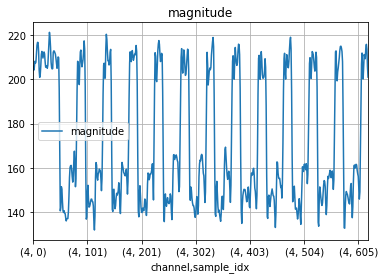

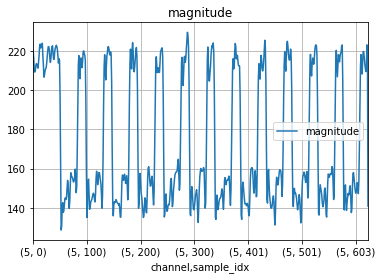

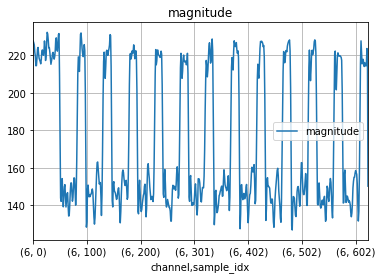

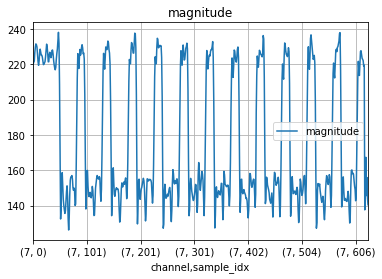

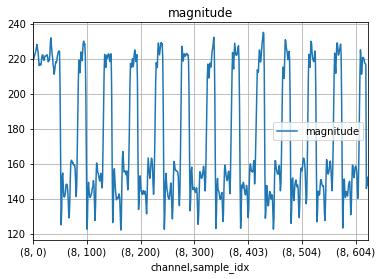

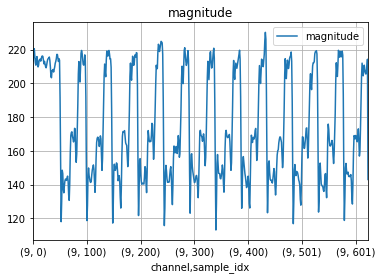

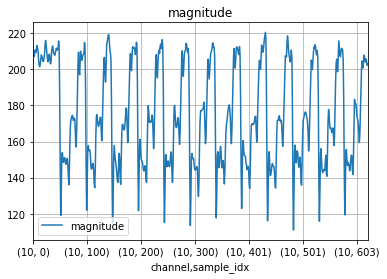

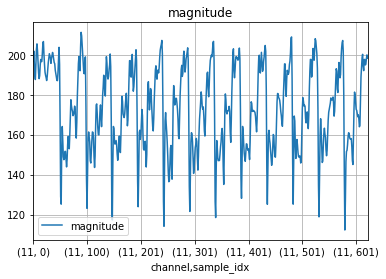

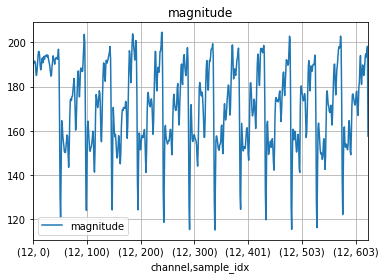

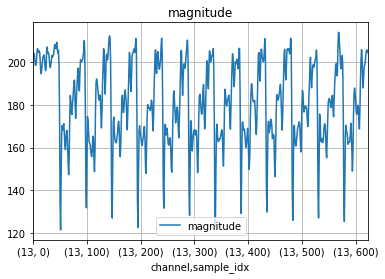

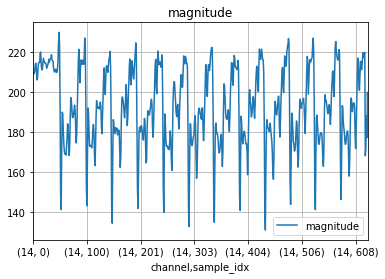

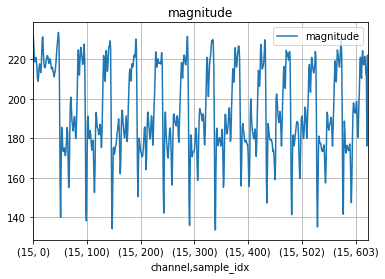

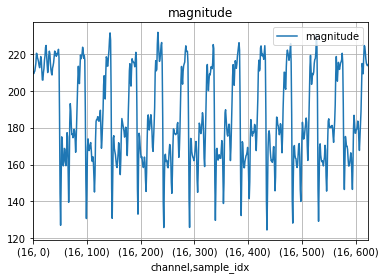

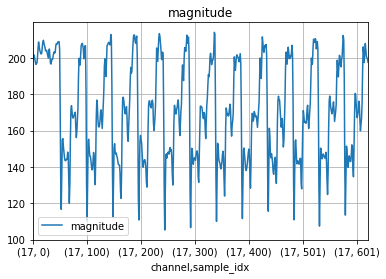

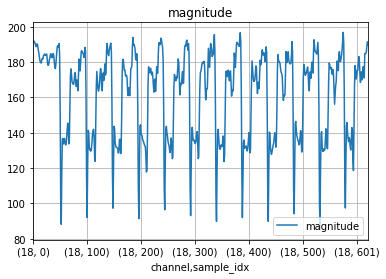

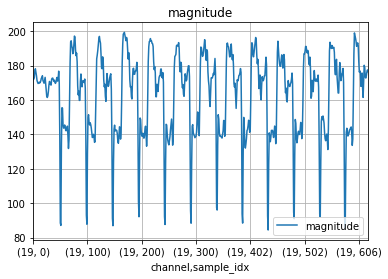

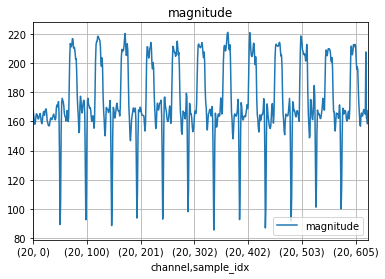

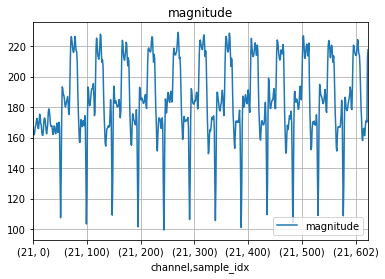

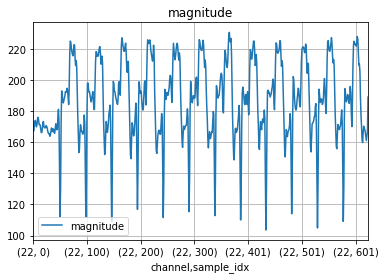

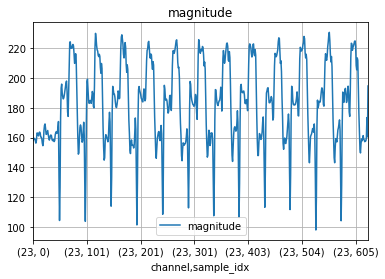

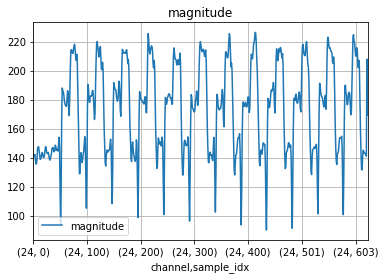

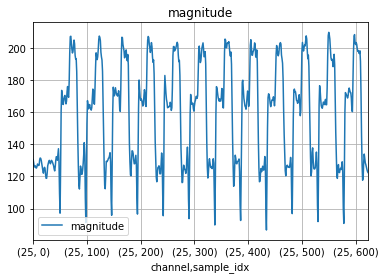

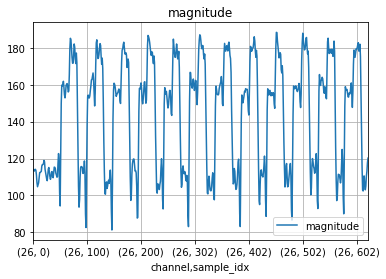

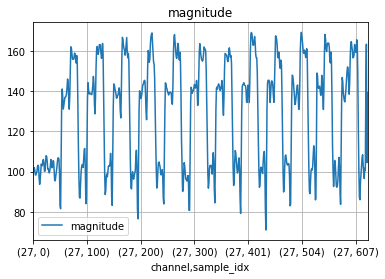

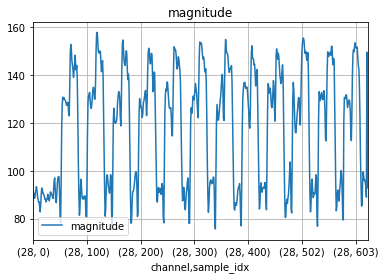

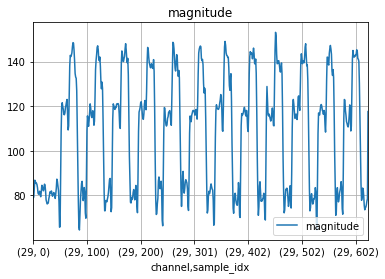

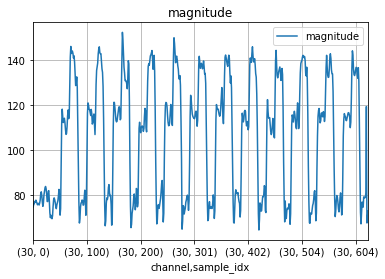

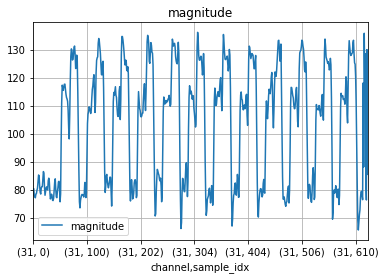

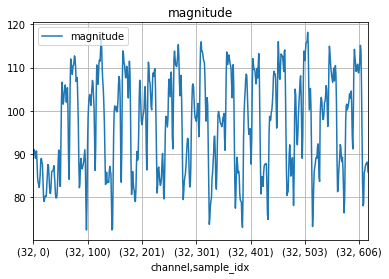

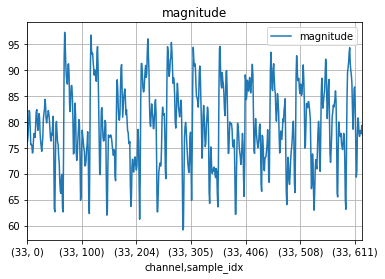

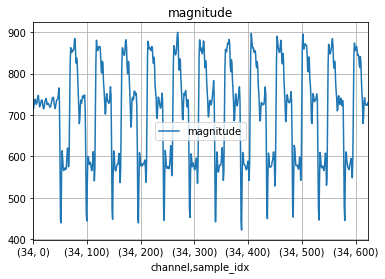

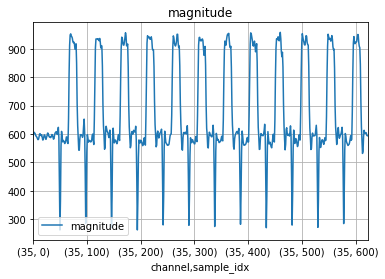

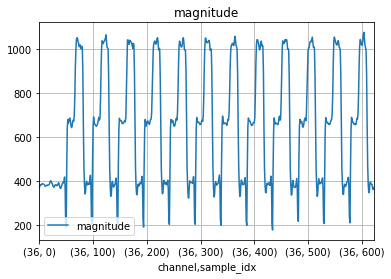

In [12]:
axes = grouped_indexed_modified[['magnitude']].plot(title="magnitude", grid=True)

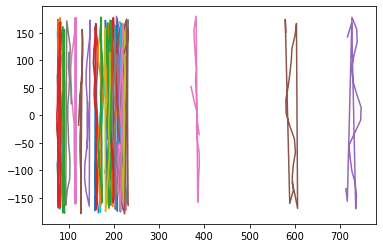

In [13]:
plt.plot(indexed_modified.unstack(level=0)['magnitude'][0:20], indexed_modified.unstack(level=0)['phase'][0:20])